In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
file_list = os.listdir("/home/jaemincho/works/Data/Dacon/health_data_clf/")
print(file_list)

['train_labels.csv', 'test_features.csv', 'train_features.csv', 'sample_submission.csv']


# EDA

In [4]:
file_path = "/home/jaemincho/works/Data/Dacon/health_data_clf/"
train_label = pd.read_csv(file_path + file_list[0])
test_features = pd.read_csv(file_path + file_list[1])
train_features = pd.read_csv(file_path + file_list[2])
sample_submissuib = pd.read_csv(file_path + file_list[3])

print(train_label.shape)
print(test_features.shape)
print(train_features.shape)

(3125, 3)
(469200, 8)
(1875000, 8)


In [5]:
train_features.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


id(3125개)별 시계열 600단위시간

In [6]:
train_label.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [7]:
train_label[["id","label"]].groupby(["label"]).count().T

label,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
id,12,21,20,23,35,25,24,26,97,37,...,24,12,13,23,37,36,20,20,23,48


In [8]:
train_label[["id","label"]].groupby(["label"]).count().values.reshape(-1)

array([  12,   21,   20,   23,   35,   25,   24,   26,   97,   37,   20,
         23,   12,   12,   25,   25,   22,   27,   47,   20,   26,   27,
         19,   20,   35,   24, 1518,   34,   55,   20,   35,   20,   18,
         20,   22,   30,   28,   35,   20,   20,   34,   20,   20,   35,
         21,   22,   20,   26,   25,   30,   37,   24,   12,   13,   23,
         37,   36,   20,   20,   23,   48])

Label 간의 데이터 수 불균형

### Sensor별 데이터 분포

In [9]:
import seaborn as sns

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


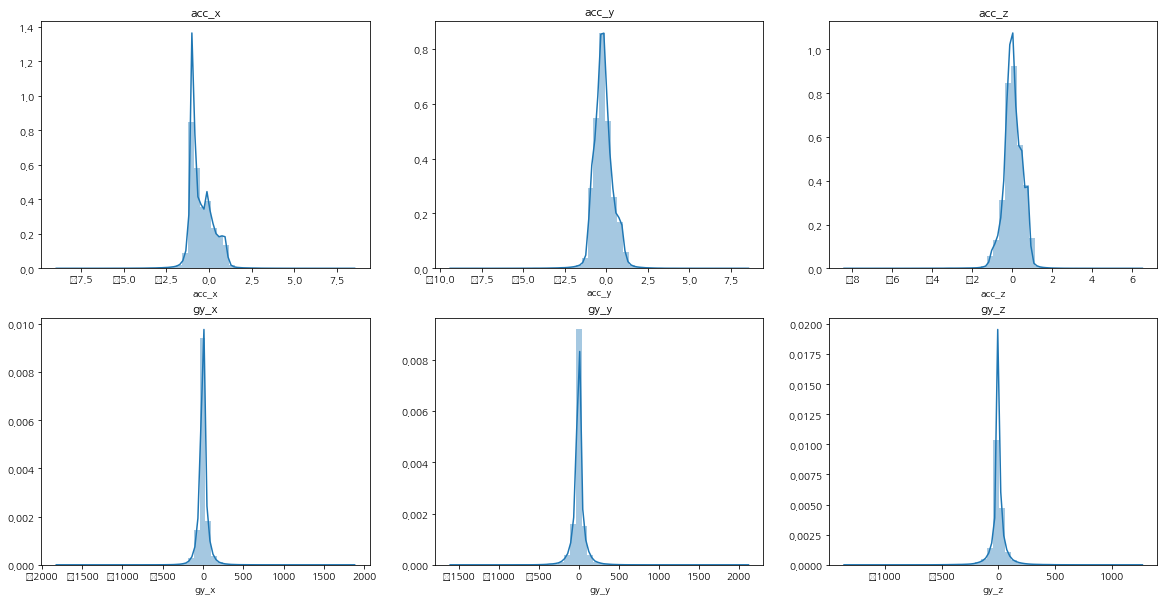

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


sns.distplot(train_features.acc_x, ax=ax1)
sns.distplot(train_features.acc_y, ax=ax2)
sns.distplot(train_features.acc_z, ax=ax3)
sns.distplot(train_features.gy_x, ax=ax4)
sns.distplot(train_features.gy_y, ax=ax5)
sns.distplot(train_features.gy_z, ax=ax6)

ax1.set_title("acc_x")
ax2.set_title("acc_y")
ax3.set_title("acc_z")
ax4.set_title("gy_x")
ax5.set_title("gy_y")
ax6.set_title("gy_z")
plt.show()

In [11]:
train_features.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,1.562000e+03,2.995000e+02,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,9.021100e+02,1.732049e+02,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,0.000000e+00,0.000000e+00,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,7.810000e+02,1.497500e+02,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,1.562000e+03,2.995000e+02,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,2.343000e+03,4.492500e+02,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,3.124000e+03,5.990000e+02,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


# Tracking moving using acc dat

In [12]:
def tracking_movement_from_acc_data(df):
    need_df = df[["id","time","acc_x","acc_y","acc_z"]].copy()
    
    # Acc Average
    need_df["Mean_acc_x"] = need_df.acc_x.rolling(window=2).mean()
    need_df["Mean_acc_y"] = need_df.acc_y.rolling(window=2).mean()
    need_df["Mean_acc_z"] = need_df.acc_z.rolling(window=2).mean()
    
    # Replace value (default velocity)
    default_vel_x = 0
    default_vel_y = 0
    default_vel_z = 0
    val_x = []
    val_y = []
    val_z = []
    for id_ in range(need_df.shape[0]):
        if need_df.time.iloc[id_] == 0:
            default_vel_x = 0
            default_vel_y = 0
            default_vel_z = 0
            val_x.append(0)
            val_y.append(0)
            val_z.append(0)
            continue
        default_vel_x += need_df.Mean_acc_x.iloc[id_]
        default_vel_y += need_df.Mean_acc_y.iloc[id_]
        default_vel_z += need_df.Mean_acc_z.iloc[id_]
        val_x.append(default_vel_x)
        val_y.append(default_vel_y)
        val_z.append(default_vel_z)
    need_df["val_x"] = val_x
    need_df["val_y"] = val_y
    need_df["val_z"] = val_z
    need_df["val_abs"] = np.sqrt(need_df.val_x.values**2 + need_df.val_y.values**2 + need_df.val_z.values**2)
    need_df["val_unit_x"] = need_df.val_x.values / np.where(need_df.val_abs.values==0, 1e-5, need_df.val_abs.values)
    need_df["val_unit_y"] = need_df.val_y.values / np.where(need_df.val_abs.values==0, 1e-5, need_df.val_abs.values)
    need_df["val_unit_z"] = need_df.val_z.values / np.where(need_df.val_abs.values==0, 1e-5, need_df.val_abs.values)
    return need_df

In [13]:
need_df = tracking_movement_from_acc_data(df=train_features)

In [14]:
need_df.head()

,id,time,acc_x,acc_y,acc_z,Mean_acc_x,Mean_acc_y,Mean_acc_z,val_x,val_y,val_z,val_abs,val_unit_x,val_unit_y,val_unit_z
0,0,0,1.206087,-0.179371,-0.148447,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,1.287696,-0.198974,-0.182444,1.246892,-0.189173,-0.165445,1.246892,-0.189173,-0.165445,1.271966,0.980287,-0.148725,-0.130070
2,0,2,1.304609,-0.195114,-0.253382,1.296153,-0.197044,-0.217913,2.543044,-0.386217,-0.383358,2.600616,0.977862,-0.148510,-0.147411
3,0,3,1.293095,-0.230366,-0.215210,1.298852,-0.212740,-0.234296,3.841896,-0.598957,-0.617655,3.937057,0.975830,-0.152133,-0.156882
4,0,4,1.300887,-0.187757,-0.222523,1.296991,-0.209062,-0.218867,5.138887,-0.808019,-0.836521,5.268854,0.975333,-0.153358,-0.158767


Caculate valocity by unit time

# Drawing graph valocity-unit time by label

In [15]:
def pivoting_by_action_time(featured_df, labels_df, to_see_col_list=["val_x","val_y","val_z"], pivot_opt="mean"):
    merged_df = pd.merge(featured_df,labels_df, on="id")
    if pivot_opt == "mean":
        pivot_table = merged_df[["label","time"]+to_see_col_list].groupby(["label","time"]).mean()
    elif pivot_opt == "std":
        pivot_table = merged_df[["label","time"]+to_see_col_list].groupby(["label","time"]).std()
    return pivot_table

In [16]:
pivot_table_mean = pivoting_by_action_time(featured_df=need_df, labels_df=train_label,
                                           to_see_col_list=["val_x","val_y","val_z"], pivot_opt="mean")

pivot_table_std = pivoting_by_action_time(featured_df=need_df, labels_df=train_label,
                                           to_see_col_list=["val_x","val_y","val_z"], pivot_opt="std")

In [17]:
pivot_table_mean

val_x      val_y      val_z
label time                                  
0     0       0.000000   0.000000   0.000000
      1      -0.025882  -0.145027  -0.464897
      2      -0.083678  -0.271595  -0.908843
      3      -0.147811  -0.402963  -1.322155
      4      -0.176694  -0.551525  -1.717829
...                ...        ...        ...
60    595  -429.047347 -82.390216  52.687896
      596  -429.817010 -82.518201  52.750568
      597  -430.583578 -82.650719  52.814241
      598  -431.347465 -82.784495  52.879428
      599  -432.109413 -82.918568  52.945216

[36600 rows x 3 columns]

In [18]:
pivot_table_std

val_x       val_y       val_z
label time                                    
0     0       0.000000    0.000000    0.000000
      1       0.428710    0.781103    0.408161
      2       0.881096    1.501842    0.848875
      3       1.300224    2.185722    1.295589
      4       1.724124    2.885477    1.738397
...                ...         ...         ...
60    595   217.912400  280.203824  155.927312
      596   218.219734  280.631426  156.161954
      597   218.526644  281.059242  156.396719
      598   218.831495  281.486342  156.631968
      599   219.135202  281.913007  156.867232

[36600 rows x 3 columns]

In [19]:
def draw_graph_by_label(featured_df, labels_df, label_filter, to_see_col_name = ["acc_x","acc_y","acc_z"]):
    merged_df = pd.merge(featured_df,labels_df, on="id")
    pivot_data = merged_df[merged_df.label==label_filter][["time"]+to_see_col_name].groupby(["time"]).mean()
    fig = plt.figure(figsize=(20, len(to_see_col_name)*5))
    for i in range(len(to_see_col_name)):
        ax = fig.add_subplot(len(to_see_col_name), 1, i+1)
        tmp_series  = pivot_data[to_see_col_name[i]].values
        ax.plot(np.arange(len(tmp_series)), tmp_series)
        ax.set_title(to_see_col_name[i])
    plt.show()

### Using ACC

### Label 0

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


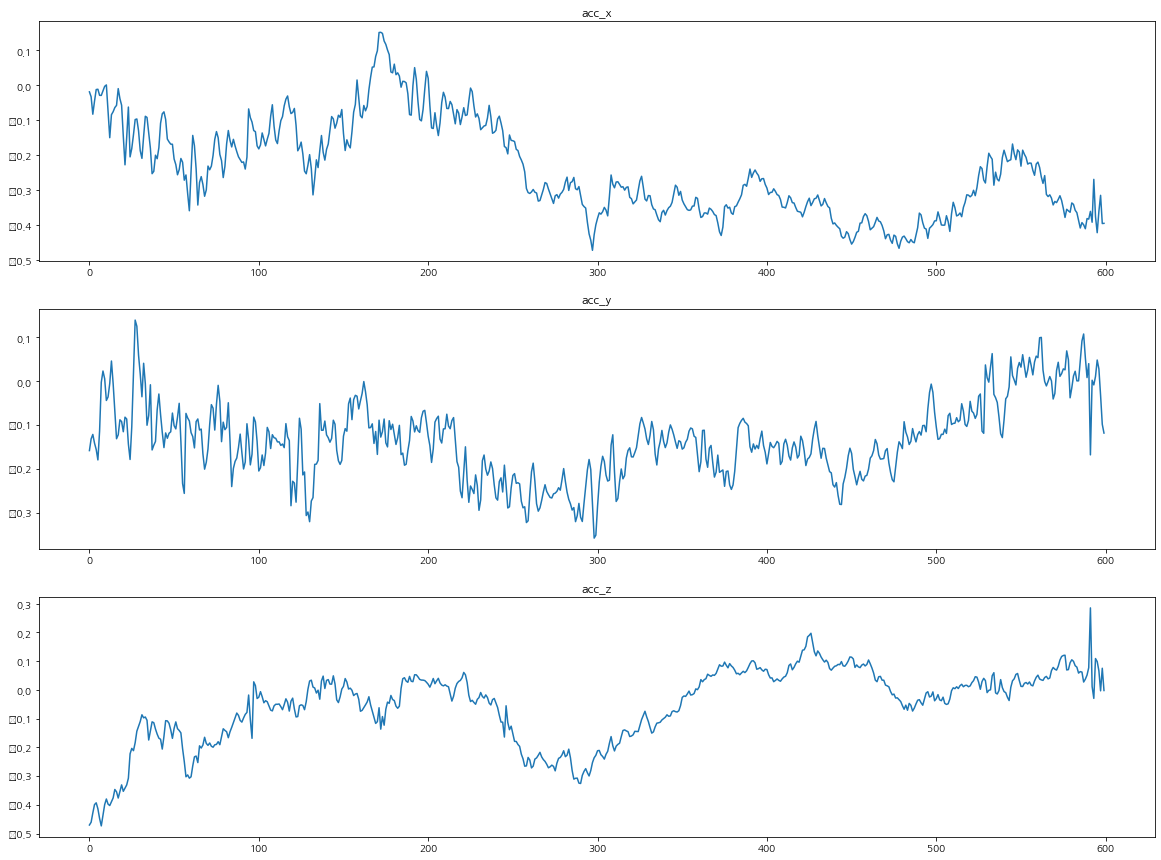

In [20]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=0,
                    to_see_col_name = ["acc_x","acc_y","acc_z"])

### Label 1

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


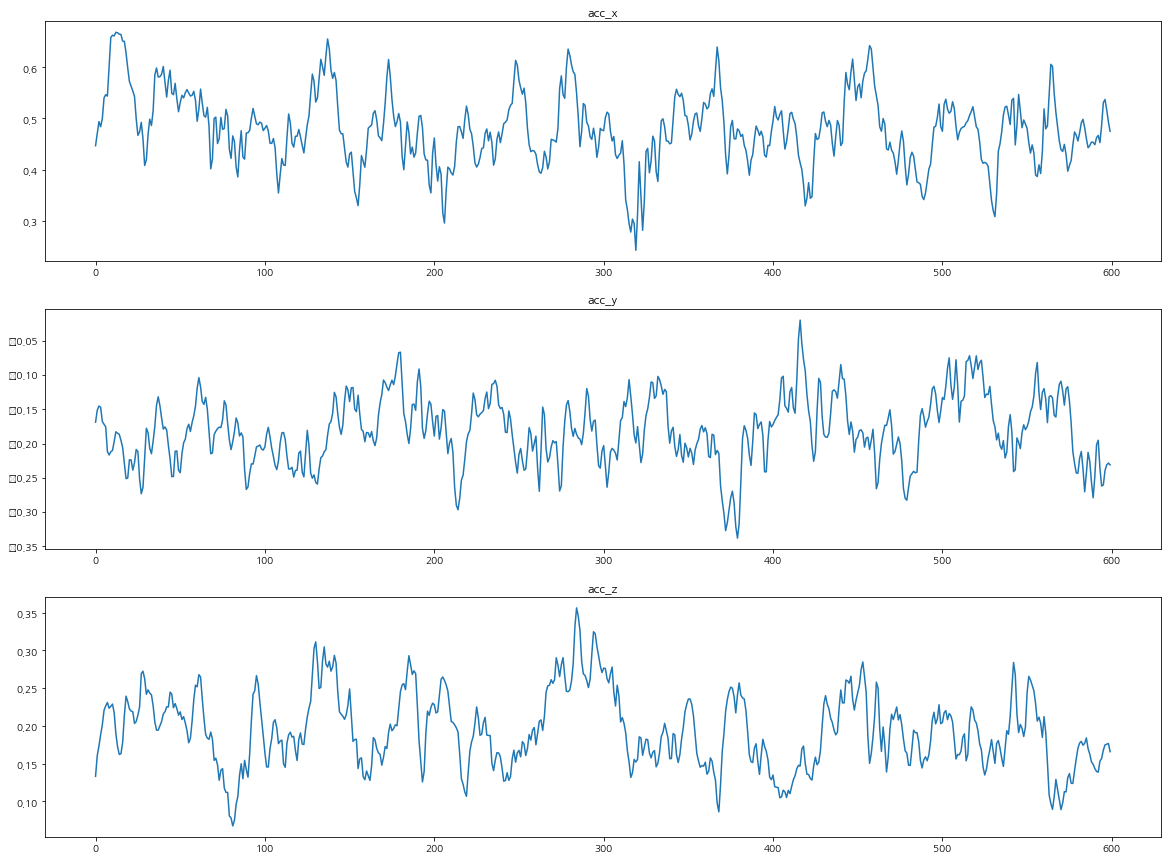

In [21]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=1,
                    to_see_col_name = ["acc_x","acc_y","acc_z"])

### Label 2

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


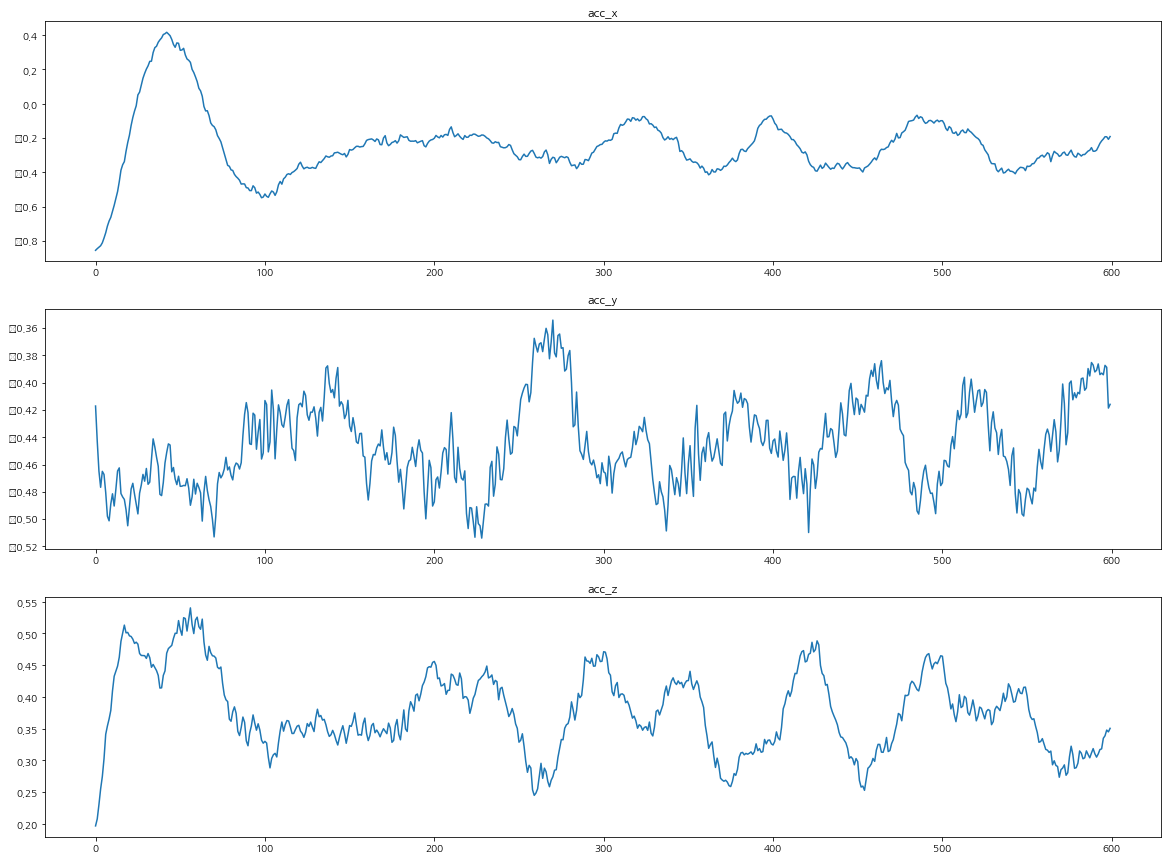

In [22]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=2,
                    to_see_col_name = ["acc_x","acc_y","acc_z"])

## Using Valocity

### Label 0

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


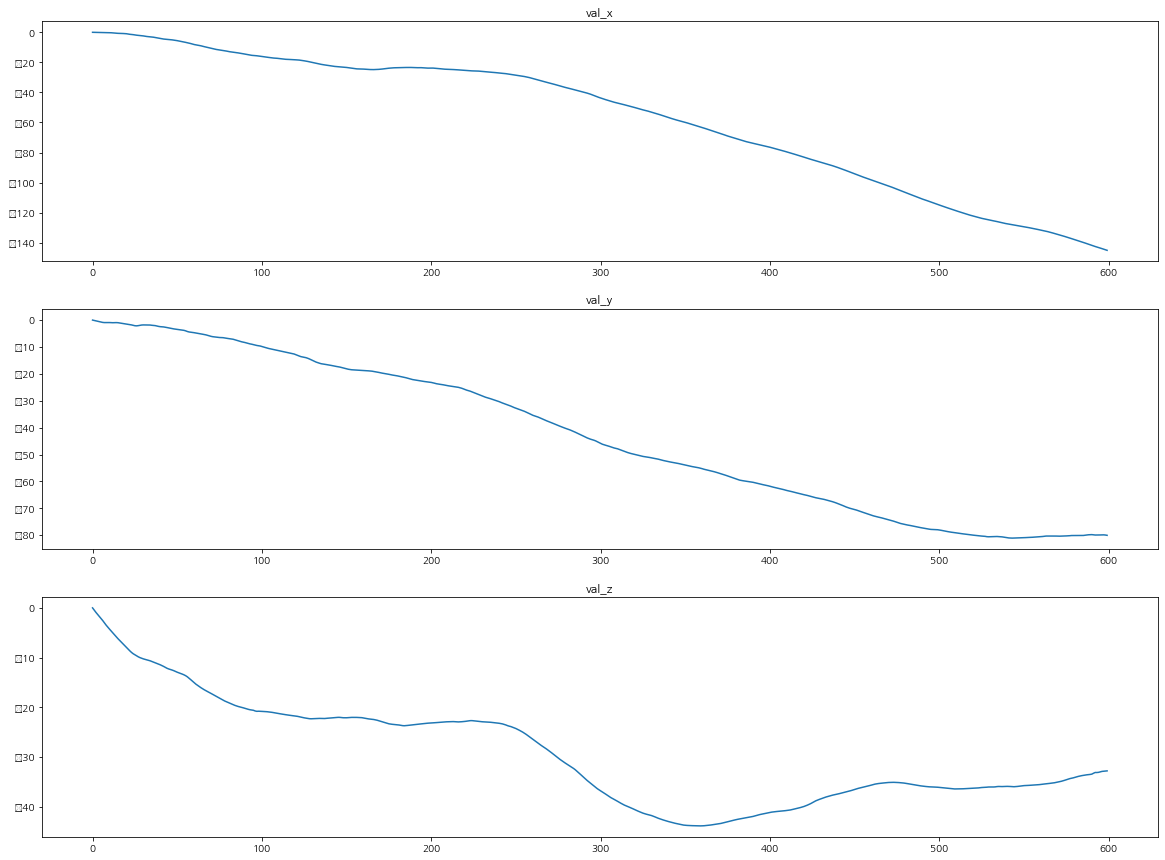

In [23]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=0,
                    to_see_col_name = ["val_x","val_y","val_z"])

### Label 1

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


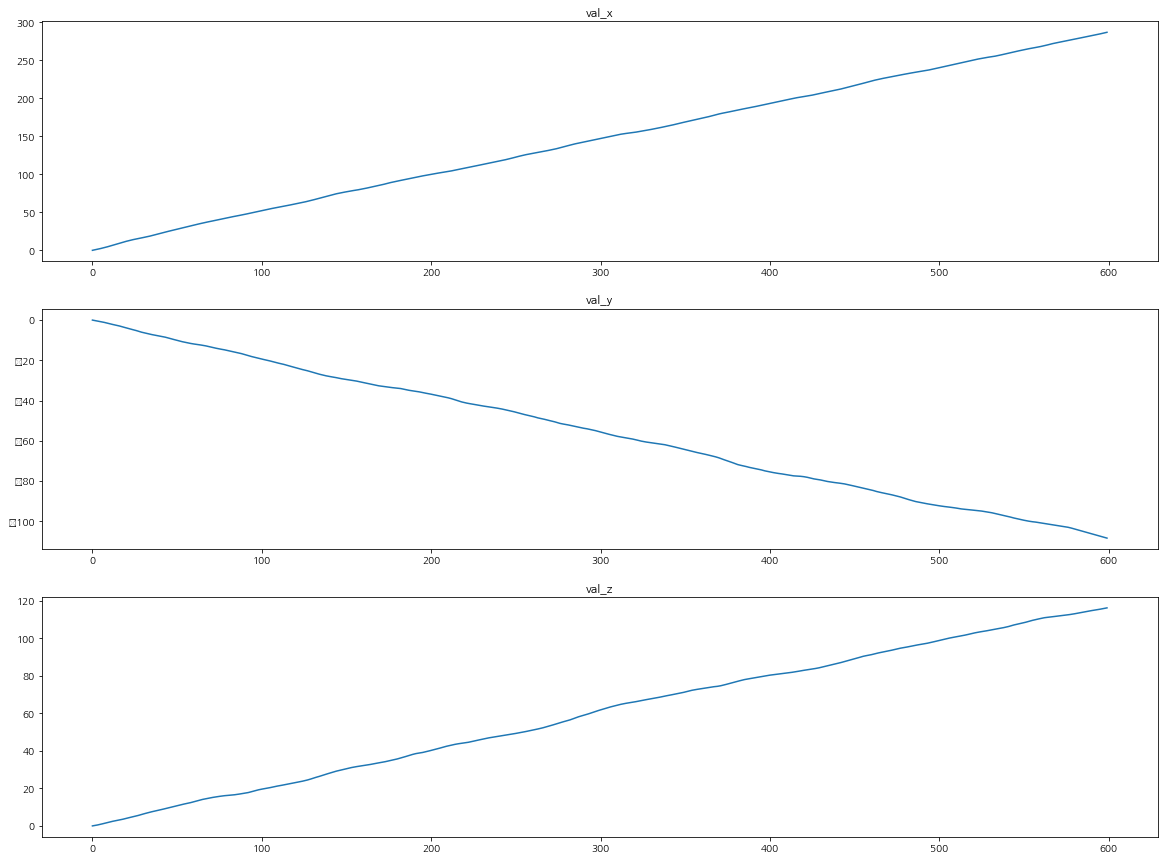

In [24]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=1,
                    to_see_col_name = ["val_x","val_y","val_z"])

### Label 2

/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaemincho/anaconda3/envs/py36t2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


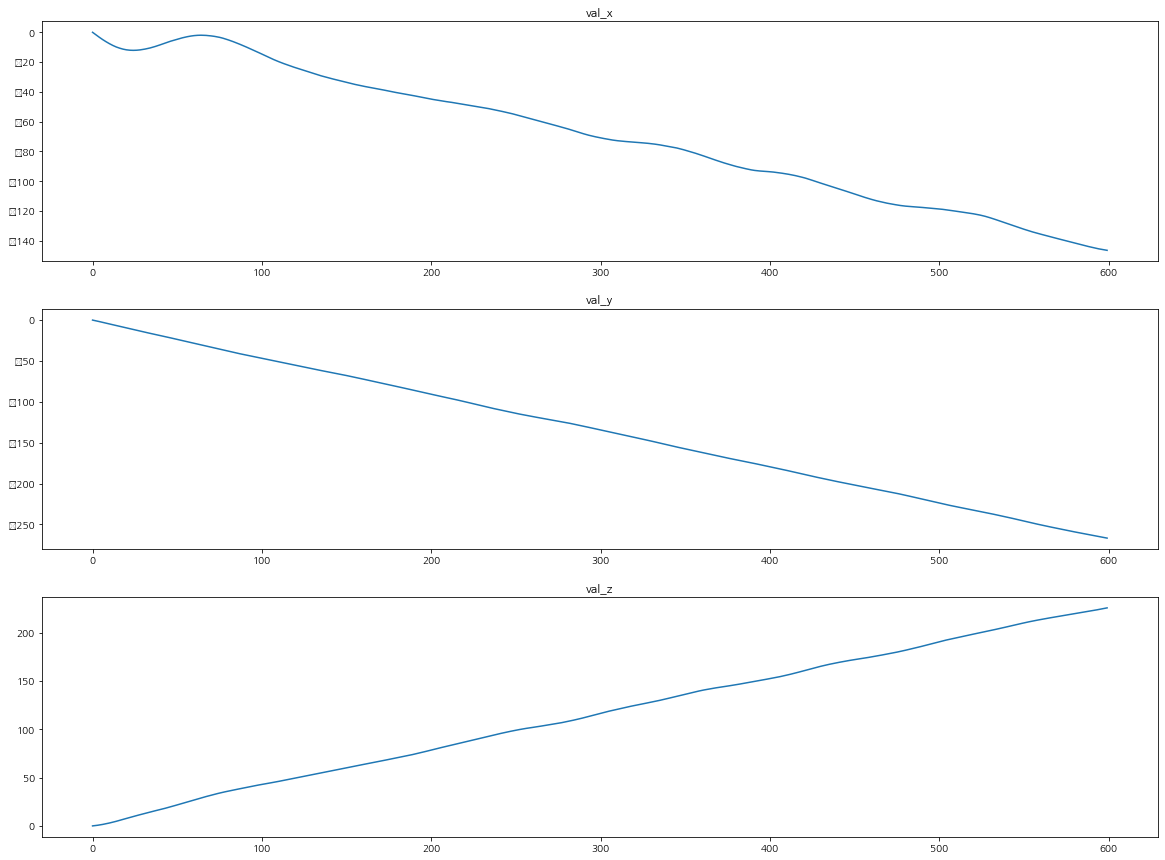

In [25]:
draw_graph_by_label(featured_df=need_df, labels_df=train_label, label_filter=2,
                    to_see_col_name = ["val_x","val_y","val_z"])

라벨 별로 차이가 있는 듯 하다...

# Testing CNN Example Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

def preprocessing_data_set_for_unitvector(train_df, label_df):
    train_set = np.array([])
    target_set = []
    for id_idx in range(train_df.id.min(),train_df.id.max()+1):
        if train_df[train_df.id==id_idx].shape[0]==0:
            continue
        mean_val = train_df[train_df.id==id_idx].val_abs.mean()
        std_val = train_df[train_df.id==id_idx].val_abs.std()
        if std_val == 0:
            std_val = 1
        nomalized_values = (train_df[train_df.id==id_idx].val_abs.values - mean_val)/std_val
        merged_set = np.concatenate((train_df[["val_unit_x","val_unit_y","val_unit_z"]][train_df.id==id_idx].values, nomalized_values.reshape(-1,1)), axis=1)
        merged_set = merged_set.reshape(1,merged_set.shape[0],merged_set.shape[1])
        if len(train_set) == 0:
            train_set = merged_set
        else:
            train_set = np.concatenate((train_set, merged_set), axis=0)
        target_set.append(label_df[label_df.id==id_idx].label.values)
    return train_set.reshape(train_set.shape[0],train_set.shape[1],train_set.shape[2],1), np.array(target_set).reshape(-1)

def data_set_spliter(input_set, label_set):
    x_train, x_val, y_train, y_val = train_test_split(input_set, label_set, test_size=0.2, stratify=label_set)
    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
    return x_train, x_val, y_train, y_val

In [27]:
input_set, target_set = preprocessing_data_set_for_unitvector(train_df=need_df, label_df=train_label)

In [28]:
print(input_set.shape, target_set.shape)

(3125, 600, 4, 1) (3125,)


In [29]:
def down_sampling(input_set, target_set, max_num):
    new_input_set = []
    new_target_set = []
    label_set = {}
    for idx in range(len(target_set)):
        if target_set[idx] not in label_set:
            label_set[target_set[idx]] = 1
            new_input_set.append(input_set[idx])
            new_target_set.append(target_set[idx])
        else:
            if label_set[target_set[idx]]<max_num:
                new_input_set.append(input_set[idx])
                new_target_set.append(target_set[idx])
                label_set[target_set[idx]] = label_set[target_set[idx]] + 1
    print(np.array(new_input_set).shape, np.array(new_target_set).shape)
    return np.array(new_input_set), np.array(new_target_set)

In [30]:
new_input_set, new_target_set = down_sampling(input_set=input_set, target_set=target_set, max_num=100)

(1707, 600, 4, 1) (1707,)


In [31]:
x_train, x_val, y_train, y_val = data_set_spliter(input_set=new_input_set, label_set=new_target_set)

(1365, 600, 4, 1) (1365,) (342, 600, 4, 1) (342,)


## Load Model

In [32]:
def return_tensorflow_model(input_shape_tuple):
    input_tens = tf.keras.Input(shape=input_shape_tuple)
    x = tf.keras.layers.Conv2D(32, kernel_size=(4,4))(input_tens)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,1))(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3,1))(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,1))(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3,1))(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(61, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

3 Layer CNN + Dense Layer

In [33]:
model = return_tensorflow_model(input_shape_tuple=(600,4,1))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 4, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 597, 1, 32)        544       
_________________________________________________________________
re_lu (ReLU)                 (None, 597, 1, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 298, 1, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 1, 32)        3104      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 296, 1, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 1, 32)        0     

In [34]:
model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

Train on 1365 samples, validate on 342 samples
Epoch 1/200
1365/1365 [==============================] - 0s 319us/sample - loss: 3.7347 - accuracy: 0.0923 - val_loss: 3.2385 - val_accuracy: 0.1491
Epoch 2/200
1365/1365 [==============================] - 0s 154us/sample - loss: 3.0845 - accuracy: 0.1692 - val_loss: 2.9415 - val_accuracy: 0.1784
Epoch 3/200
1365/1365 [==============================] - 0s 153us/sample - loss: 2.8317 - accuracy: 0.2315 - val_loss: 2.7965 - val_accuracy: 0.2164
Epoch 4/200
1365/1365 [==============================] - 0s 153us/sample - loss: 2.7015 - accuracy: 0.2366 - val_loss: 2.7359 - val_accuracy: 0.1842
Epoch 5/200
1365/1365 [==============================] - 0s 155us/sample - loss: 2.6122 - accuracy: 0.2520 - val_loss: 2.6978 - val_accuracy: 0.1930
Epoch 6/200
1365/1365 [==============================] - 0s 155us/sample - loss: 2.5523 - accuracy: 0.2440 - val_loss: 2.6655 - val_accuracy: 0.2222
Epoch 7/200
1365/1365 [==============================] - 0s

1365/1365 [==============================] - 0s 154us/sample - loss: 0.5695 - accuracy: 0.8293 - val_loss: 6.5116 - val_accuracy: 0.2982
Epoch 110/200
1365/1365 [==============================] - 0s 155us/sample - loss: 0.4853 - accuracy: 0.8476 - val_loss: 6.4657 - val_accuracy: 0.2895
Epoch 111/200
1365/1365 [==============================] - 0s 156us/sample - loss: 0.4541 - accuracy: 0.8564 - val_loss: 6.6563 - val_accuracy: 0.2982
Epoch 112/200
1365/1365 [==============================] - 0s 154us/sample - loss: 0.4387 - accuracy: 0.8645 - val_loss: 6.7438 - val_accuracy: 0.3070
Epoch 113/200
1365/1365 [==============================] - 0s 155us/sample - loss: 0.4297 - accuracy: 0.8571 - val_loss: 6.7092 - val_accuracy: 0.3012
Epoch 114/200
1365/1365 [==============================] - 0s 153us/sample - loss: 0.3793 - accuracy: 0.8828 - val_loss: 6.9310 - val_accuracy: 0.2982
Epoch 115/200
1365/1365 [==============================] - 0s 154us/sample - loss: 0.3810 - accuracy: 0.8784

## Check result

In [35]:
train_predict = model.predict(x_train)
val_predict = model.predict(x_val)

In [36]:
def draw_confusion_matrix_and_print_accuracy(predicted_label, real_label):
    print(accuracy_score(real_label, predicted_label))
    print(confusion_matrix(real_label, predicted_label))

In [37]:
def return_armax(arrs):
    return np.argmax(arrs, axis=1)

In [38]:
train_predict = return_armax(arrs=train_predict)
val_predict = return_armax(arrs=val_predict)

In [39]:
draw_confusion_matrix_and_print_accuracy(predicted_label=train_predict, real_label=y_train)

0.9692307692307692
[[10  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 36]]


In [40]:
draw_confusion_matrix_and_print_accuracy(predicted_label=val_predict, real_label=y_val)

0.2807017543859649
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]


In [41]:
import seaborn as sns
#From https://www.kaggle.com/agungor2/various-confusion-matrix-plots
def plot_cm(y_true, y_pred, figsize=(20,20)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

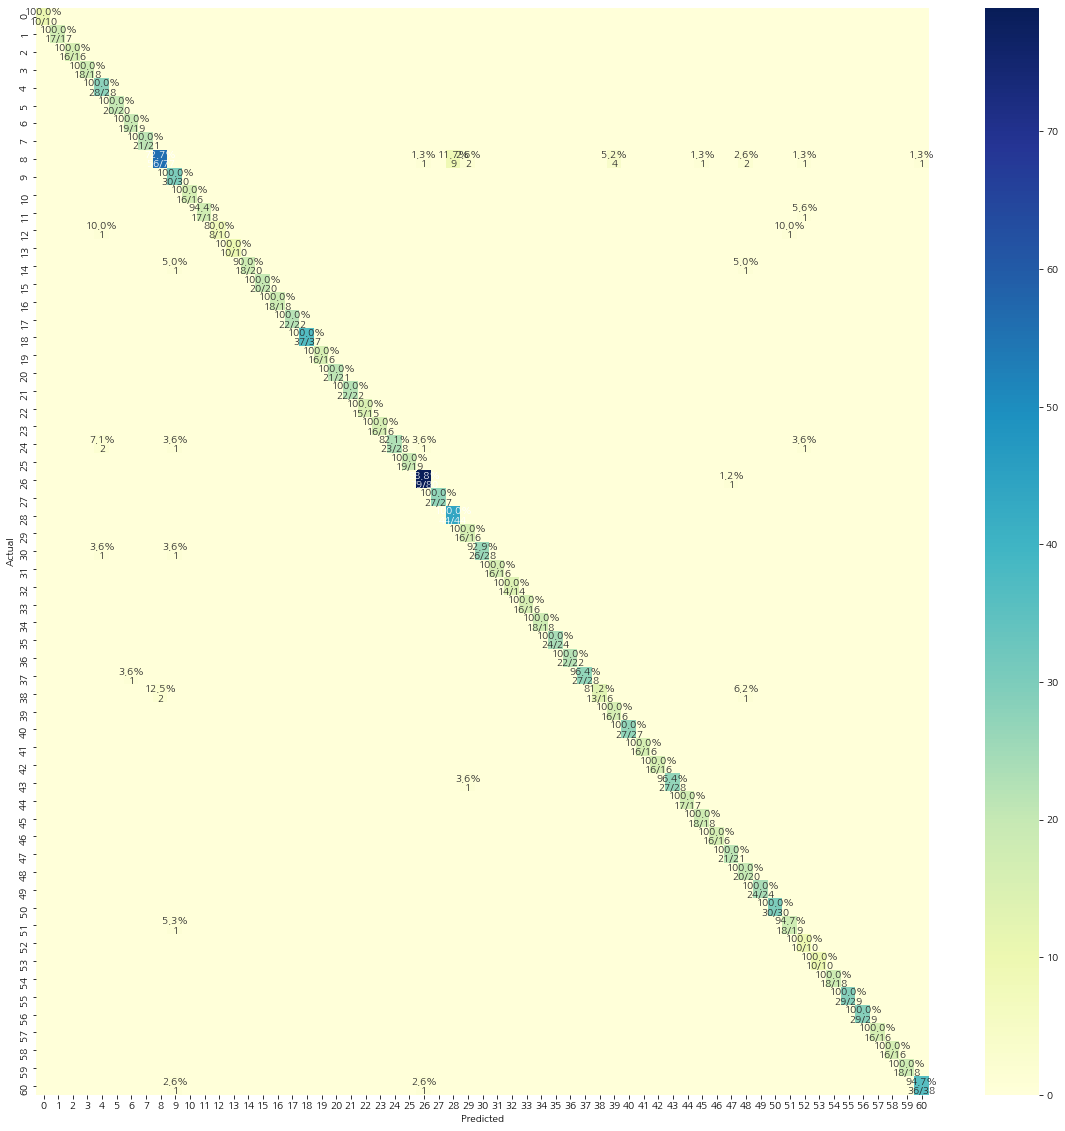

In [42]:
plot_cm(y_true=y_train, y_pred=train_predict)

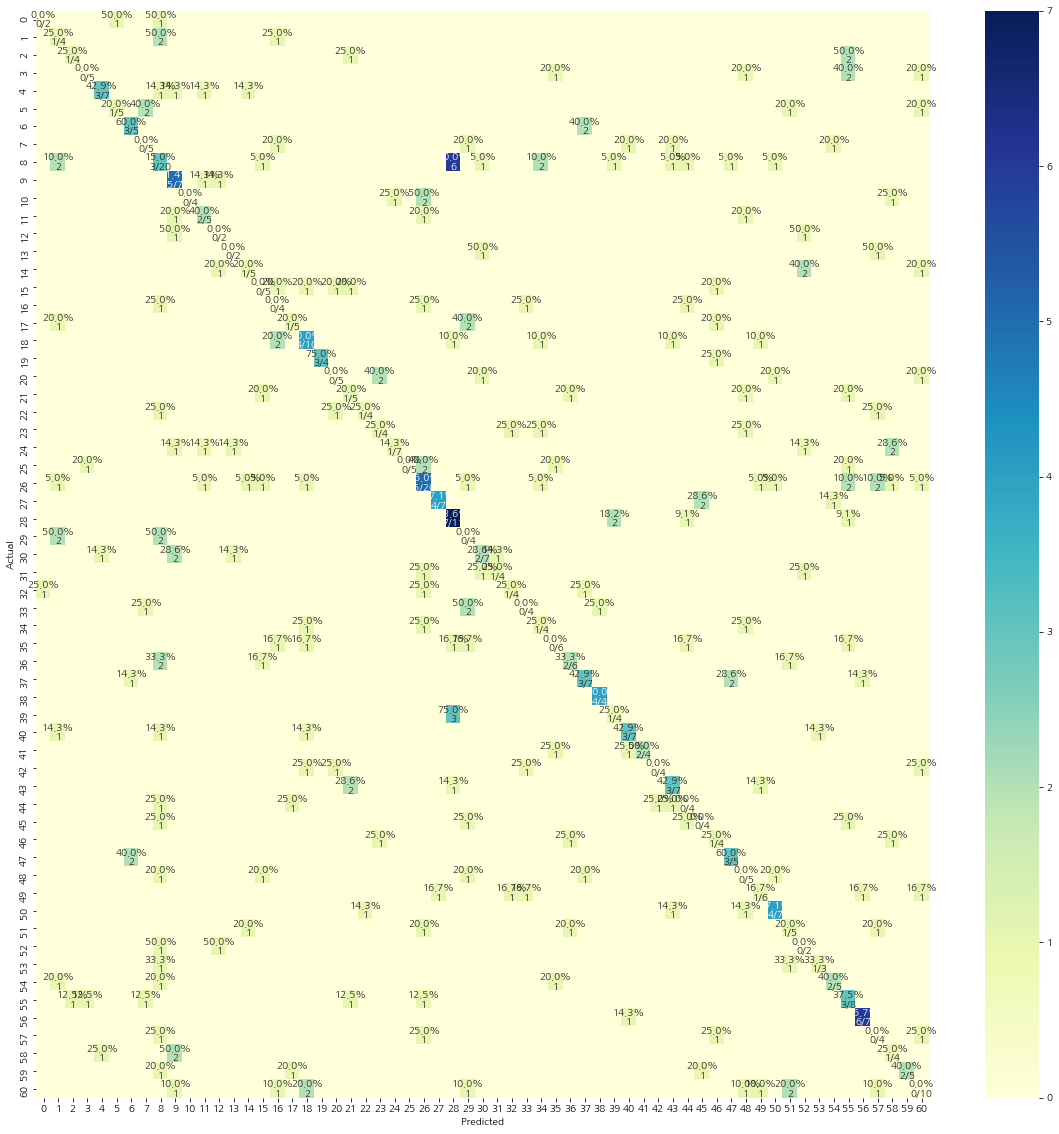

In [43]:
plot_cm(y_true=y_val, y_pred=val_predict)

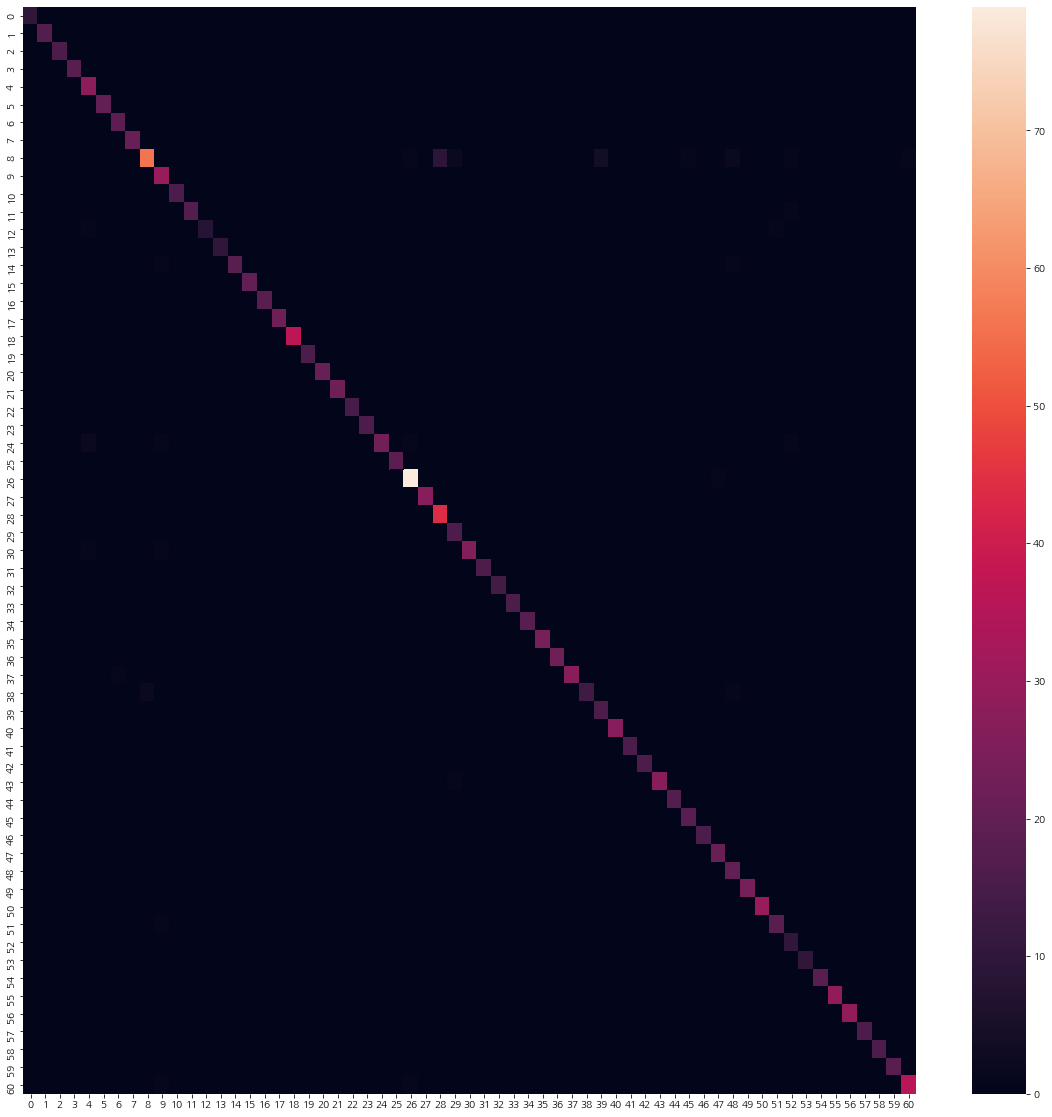

In [44]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_train, train_predict), ax=ax)
plt.show()

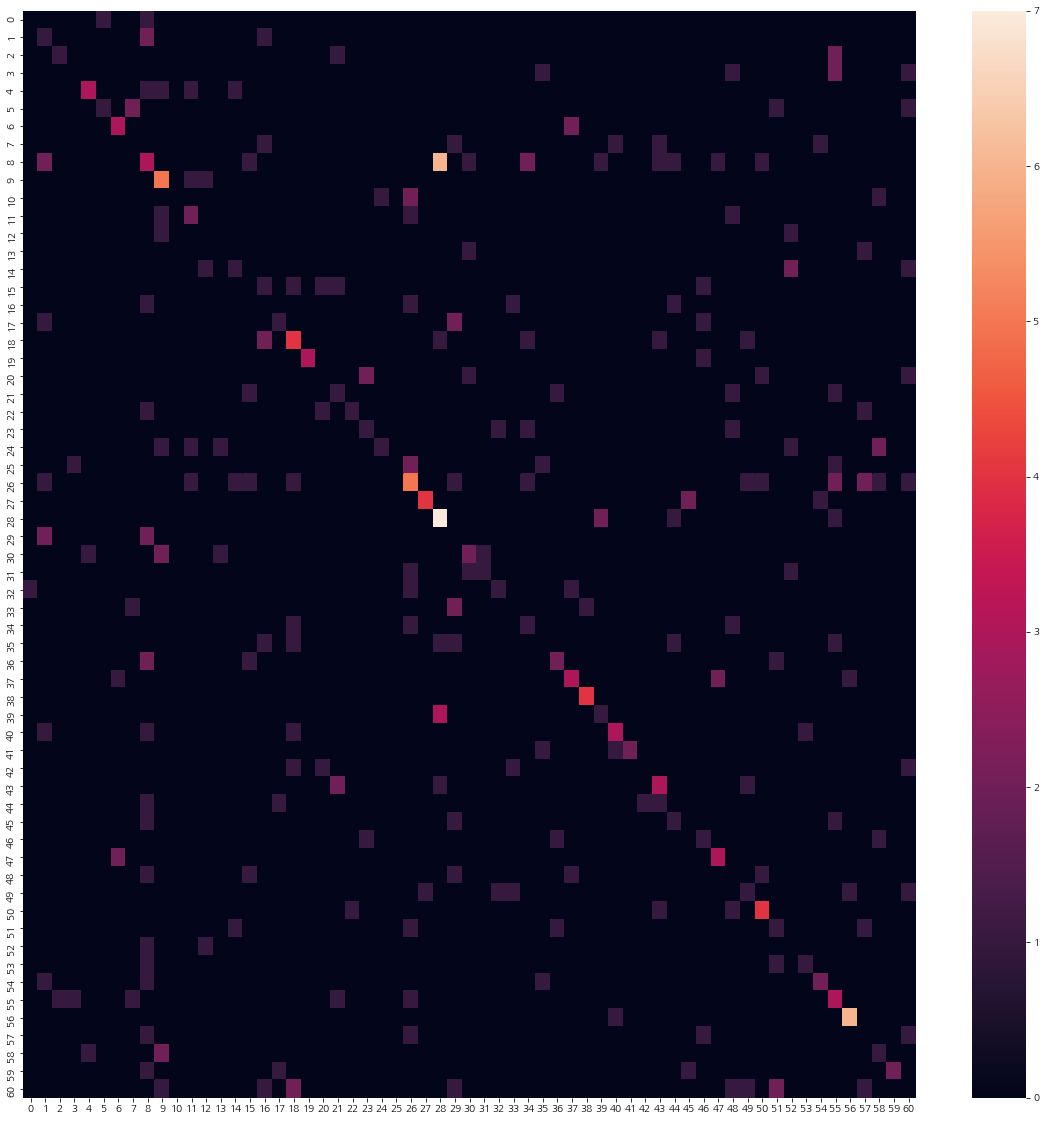

In [45]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_val, val_predict), ax=ax)
plt.show()